In [19]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
from pandas import DataFrame
from scipy import signal
from scipy.io import loadmat
from scipy.signal import butter, lfilter
import torch
import sklearn

In [20]:
# file names to health conditions
motor_data_files: dict[str, str] = {
    "struct_rs_R1.mat": "healthy",
    "struct_r1b_R1.mat": "broken_bar_1",
    "struct_r2b_R1.mat": "broken_bar_2",
    "struct_r3b_R1.mat": "broken_bar_3",
    "struct_r4b_R1.mat": "broken_bar_4"
}


all_data: DataFrame = pd.DataFrame()

for file_name, health_status in motor_data_files.items():
    # extract the struct name from the file name
    struct_name: str = file_name.split("_")[1].split(".")[0]
    mat_data: np.void = sio.loadmat(file_name)[struct_name][0][0]

    # process each torque level in the data
    for name in mat_data.dtype.names:
        new = DataFrame(mat_data[name].flatten())
        new["Load_Torque"] = int(name.replace("torque", ""))
        new["Health"] = health_status
        result_new: DataFrame = new.copy()
        for column in result_new.columns:
            # Check if we have nested arrays with single elements
            if isinstance(result_new[column].iloc[0], np.ndarray):
                # flatten
                result_new[column] = result_new[column].apply(
                    lambda x: x.flatten()
                )
        all_data = pd.concat([all_data, result_new], ignore_index=True)

all_data


,Va,Vb,Vc,Ia,Ib,Ic,Vib_acpi,Vib_carc,Vib_acpe,Trigger,Vib_axial,Vib_base,Load_Torque,Health
0,"[3.341667, 3.35, 3.3, 3.4, 3.275, 3.408333, 3....","[3.341667, 3.35, 3.316667, 3.358333, 3.25, 3.4...","[3.333333, 3.358333, 3.266667, 3.4, 3.258333, ...","[0.01666667, 0.008333333, 0.0, -0.008333333, 0...","[-0.004166667, 0.0, 0.0, 0.004166667, -0.00833...","[0.0125, 0.0125, 0.008333333, 0.0, 0.004166667...","[-0.07019043, -0.04577637, -0.0213623, 0.0, 0....","[-0.003051758, 0.01525879, 0.02746582, 0.03967...","[-0.0213623, -0.0213623, -0.0213623, -0.030517...","[6.219788, 6.219482, 6.219177, 6.219788, 6.219...","[0.01831055, 0.01525879, 0.01220703, 0.0122070...","[0.2624512, 0.1922607, 0.1098633, 0.01220703, ...",5,healthy
1,"[-2.933333, -2.95, -2.958333, -2.958333, -2.97...","[-2.95, -2.933333, -2.966667, -2.975, -2.975, ...","[-2.966667, -2.95, -2.95, -2.95, -2.958333, -2...","[0.008333333, 0.0, 0.0, 0.0, 0.008333333, 0.0,...","[0.0, 0.004166667, 0.0, 0.0, 0.004166667, 0.01...","[0.004166667, -0.004166667, 0.004166667, 0.004...","[0.03356934, 0.0213623, 0.01831055, 0.00610351...","[0.1434326, 0.1312256, 0.1098633, 0.0793457, 0...","[0.2349854, 0.2044678, 0.189209, 0.1678467, 0....","[6.198425, 6.199646, 6.200562, 6.201782, 6.202...","[0.0, -0.03356934, -0.0213623, 0.0, 0.00610351...","[-0.0793457, -0.1922607, -0.2716064, -0.308227...",5,healthy
2,"[2.45, 2.425, 2.358333, 2.308333, 2.283333, 2....","[2.491667, 2.391667, 2.375, 2.333333, 2.316667...","[2.458333, 2.416667, 2.358333, 2.316667, 2.308...","[0.008333333, 0.008333333, 0.0, 0.0, -0.008333...","[0.004166667, -0.008333333, 0.008333333, 0.016...","[0.004166667, -0.004166667, 0.0, -0.004166667,...","[0.5859375, 0.5737305, 0.5706787, 0.5554199, 0...","[0.1403809, 0.1342773, 0.1281738, 0.1037598, 0...","[0.2532959, 0.2593994, 0.2685547, 0.2807617, 0...","[6.169128, 6.169434, 6.168518, 6.167908, 6.167...","[-0.02746582, -0.02746582, -0.03051758, -0.027...","[-0.189209, -0.2044678, -0.1861572, -0.1190186...",10,healthy
3,"[-2.866667, -2.833333, -2.841667, -2.825, -2.8...","[-2.858333, -2.85, -2.825, -2.816667, -2.84166...","[-2.866667, -2.858333, -2.841667, -2.85, -2.84...","[-0.008333333, 0.004166667, 0.0, 0.004166667, ...","[-0.004166667, 0.0125, 0.0, 0.004166667, 0.0, ...","[-0.004166667, -0.004166667, 0.008333333, 0.00...","[0.01220703, 0.02441406, 0.06408691, 0.0915527...","[0.5401611, 0.5249023, 0.5096436, 0.4974365, 0...","[-0.1708984, -0.1678467, -0.1617432, -0.164794...","[6.150513, 6.152039, 6.152954, 6.153564, 6.154...","[-0.006103516, -0.003051758, -0.009155273, -0....","[0.1495361, 0.2532959, 0.3356934, 0.3875732, 0...",10,healthy
4,"[3.125, 3.275, 3.141667, 3.25, 3.15, 3.266667,...","[3.125, 3.266667, 3.158333, 3.241667, 3.158333...","[3.133333, 3.266667, 3.15, 3.25, 3.191667, 3.2...","[0.0, 0.008333333, 0.0, 0.008333333, 0.0166666...","[0.0, 0.0, 0.004166667, 0.0125, 0.008333333, 0...","[0.0, 0.0, 0.0125, 0.004166667, 0.008333333, 0...","[-0.1312256, -0.1068115, -0.07019043, -0.03662...","[0.01831055, 0.05493164, 0.09460449, 0.1281738...","[0.1556396, 0.1678467, 0.1739502, 0.1800537, 0...","[6.139221, 6.138916, 6.138916, 6.138, 6.138306...","[0.0, -0.003051758, -0.006103516, -0.009155273...","[0.2044678, 0.1190186, 0.01525879, -0.07019043...",15,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,"[2.558333, 2.558333, 2.575, 2.608333, 2.616667...","[2.541667, 2.55, 2.583333, 2.608333, 2.633333,...","[2.566667, 2.583333, 2.566667, 2.6, 2.625, 2.6...","[-0.008333333, -0.008333333, -0.008333333, -0....","[0.0125, -0.004166667, 0.004166667, -0.0083333...","[0.004166667, 0.004166667, 0.0, 0.004166667, -...","[0.1678467, 0.177002, 0.1861572, 0.1983643, 0....","[0.006103516, 0.009155273, 0.003051758, -0.021...","[0.378418, 0.378418, 0.3967285, 0.402832, 0.39...","[6.15387, 6.15448, 6.156006, 6.156006, 6.15661...","[0.0, -0.003051758, -0.003051758, 0.003051758,...","[0.5371094, 0.5584717, 0.579834, 0.5645752, 0....",30,broken_bar_4
76,"[-1.991667, -1.983

In [21]:
# Number of experiments
num_experiments = 2  # Up to a maximum of 10 if using the original dataset

# Names of the original data files restored from the zip archive
files = [
    "struct_rs_R1.mat",
    "struct_r1b_R1.mat",
    "struct_r2b_R1.mat",
    "struct_r3b_R1.mat",
    "struct_r4b_R1.mat",
]

# Rotor conditions (number of broken bars) corresponding to original data files
health = [
    "healthy",
    "broken_bar_1",
    "broken_bar_2",
    "broken_bar_3",
    "broken_bar_4",
]

# Sampling frequencies
Fs_vib = 7600  # Vibration signals in Hz
Fs_elec = 50000  # Electrical signals in Hz

# Create a target folder to store the ensemble member data files
folder = "data_files"
if not os.path.exists(folder):
    os.makedirs(folder)

# Iterate over the original data files
for i, file in enumerate(files):
    # Load the original dataset stored as a struct
    S = sio.loadmat(file)
    fields = list(S.keys())
    dataset = S[fields[3]]  # Adjust index based on the actual structure of the .mat file

    load_levels = list(dataset.dtype.names)
    # Iterate over load (torque) levels in each dataset
    for load_level in load_levels:
        experiments = dataset[load_level][0, 0]
        data = {}

        # Iterate over the given number of experiments for each load level
        for k in range(num_experiments):
            signal_names = experiments.dtype.names
            # Iterate over the signals in each experimental dataset
            for signal_name in signal_names:
                # Experimental (electrical and vibration) data
                data[signal_name] = experiments[signal_name][0, k]

            # Operating conditions
            data["Health"] = health[i]
            data["Load"] = load_level

            # Constant parameters
            data["Fs_vib"] = Fs_vib
            data["Fs_elec"] = Fs_elec

            # Save memberwise data
            name = f"rotor{i}_b_{load_level}_experiment{k + 1:02d}"
            filename = os.path.join(folder, f"{name}.mat")
            sio.savemat(filename, data)

Processing data file struct_rs_R1.mat
	Creating the member data file rotor0_b_torque05_experiment01.mat
	Creating the member data file rotor0_b_torque05_experiment02.mat
	Creating the member data file rotor0_b_torque10_experiment01.mat
	Creating the member data file rotor0_b_torque10_experiment02.mat
	Creating the member data file rotor0_b_torque15_experiment01.mat
	Creating the member data file rotor0_b_torque15_experiment02.mat
	Creating the member data file rotor0_b_torque20_experiment01.mat
	Creating the member data file rotor0_b_torque20_experiment02.mat
	Creating the member data file rotor0_b_torque25_experiment01.mat
	Creating the member data file rotor0_b_torque25_experiment02.mat
	Creating the member data file rotor0_b_torque30_experiment01.mat
	Creating the member data file rotor0_b_torque30_experiment02.mat
	Creating the member data file rotor0_b_torque35_experiment01.mat
	Creating the member data file rotor0_b_torque35_experiment02.mat
	Creating the member data file rotor0_

In [22]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def get_signal(mat_data: dict, signame: str, fs) -> DataFrame:
    """
    Extract a 1.0 second portion of the signal after 10 seconds of measurements.

    Args:
        mat_data: Dictionary containing data loaded from .mat file
        signame: Signal name to extract
        fs: Sampling frequency in Hz

    Returns:
        A pandas DataFrame with time index and signal data
    """
    sig_data = mat_data[signame]
    n = len(sig_data)
    t = np.arange(n) / fs

    # Find indices for data between 10.0 and 11.0 seconds
    idx = np.where((t >= 10.0) & (t <= 11.0))[0]

    # Create a time series with proper time index
    time_idx = pd.to_timedelta(t[idx], unit='s')
    return pd.DataFrame({'Data': sig_data[idx].flatten()}, index=time_idx)


def read_member_data(filename: str, variables: list[str]) -> DataFrame:
    """
    Read variables from a .mat file

    Args:
        filename: Path to .mat file to read
        variables: List of variable names to read

    Returns:
        A pandas DataFrame with the requested variables
    """
    # Load the .mat file
    mat_data = sio.loadmat(filename)

    # Initialize a dictionary to hold the data
    data_dict = {}

    for var in variables:
        if var in ['Health', 'Load']:
            # Condition variables
            val = str(mat_data[var][0]) if isinstance(mat_data[var], np.ndarray) else mat_data[var]

        elif var in ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']:
            # Electrical signals
            val = get_signal(mat_data, var, mat_data['Fs_elec'][0][0])

        elif var in ['Vib_acpi', 'Vib_carc', 'Vib_acpe', 'Vib_axial', 'Vib_base', 'Trigger']:
            # Vibration signals
            val = get_signal(mat_data, var, mat_data['Fs_vib'][0][0])

        elif var == 'Vib_acpi_env':
            # Synthetic envelope signals for vibration data
            sig = var.replace('_env', '')
            TT = get_signal(mat_data, sig, mat_data['Fs_vib'][0][0])

            # Envelope of band-pass filtered signal
            fs = mat_data['Fs_vib'][0][0]
            y = butter_bandpass_filter(TT['Data'].values, 900, 1300, fs)
            y_envelope = np.abs(signal.hilbert(y))

            val = pd.DataFrame({'Data': y_envelope}, index=TT.index)

        elif var == 'Ia_env_ps':
            # Synthetic envelope spectra for electrical data
            sig = var.replace('_env_ps', '')
            TT = get_signal(mat_data, sig, mat_data['Fs_elec'][0][0])

            # Envelope spectrum of band-pass filtered signal
            fs = mat_data['Fs_elec'][0][0]
            y = butter_bandpass_filter(TT['Data'].values, 900, 1300, fs)
            y_envelope = np.abs(signal.hilbert(y))

            # Calculate power spectrum
            f, pxx = signal.periodogram(y_envelope, fs)
            val = np.column_stack((f, pxx))

        else:
            # Other features and signals
            val = mat_data.get(var, None)

        # Store the value in the dictionary
        data_dict[var] = [val]

    # Create DataFrame from dictionary
    return pd.DataFrame(data_dict)

In [33]:
class FileEnsembleDatastore:
    """Python implementation of MATLAB's fileEnsembleDatastore"""

    def __init__(self, location, extension):
        self.location = location
        self.extension = extension
        self.files = [f for f in os.listdir(location) if f.endswith(extension)]
        self.read_fcn = None
        self.write_to_member_fcn = None
        self.data_variables = []
        self.independent_variables = []
        self.condition_variables = []
        self.selected_variables = []
        self.read_size = 1
        self.num_members = len(self.files)
        self.last_member_read = ""
        self.current_idx = 0

    def read(self):
        """Read the next file from the ensemble"""
        if self.current_idx >= self.num_members:
            return None

        file_path = os.path.join(self.location, self.files[self.current_idx])
        self.last_member_read = self.files[self.current_idx]
        self.current_idx += 1

        # Use the read function to get data
        return self.read_fcn(file_path, self.selected_variables)

    def reset(self):
        """Reset the reading position to the beginning"""
        self.current_idx = 0
        self.last_member_read = ""

    def write_to_member(self, member_idx, data):
        """Write data to a specific member file"""
        if member_idx >= self.num_members:
            raise ValueError("Member index out of range")

        file_path = os.path.join(self.location, self.files[member_idx])
        self.write_to_member_fcn(file_path, data)

    def __repr__(self):
        """String representation similar to MATLAB's display"""
        return (
            f"FileEnsembleDatastore with properties:\n\n"
            f"                ReadFcn: {self.read_fcn.__name__ if self.read_fcn else 'None'}\n"
            f"       WriteToMemberFcn: {self.write_to_member_fcn.__name__ if self.write_to_member_fcn else 'None'}\n"
            f"          DataVariables: {len(self.data_variables)}×1 list\n"
            f"   IndependentVariables: {len(self.independent_variables)}×0 list\n"
            f"     ConditionVariables: {len(self.condition_variables)}×1 list\n"
            f"      SelectedVariables: {len(self.selected_variables)}×1 list\n"
            f"               ReadSize: {self.read_size}\n"
            f"             NumMembers: {self.num_members}\n"
            f"         LastMemberRead: {self.last_member_read}\n"
            f"                  Files: {self.num_members}×1 list"
        )


# Function to write member data (adapter for MATLAB's writeMemberData)
def write_member_data(filename, data):
    """Write data structure to a .mat file"""
    sio.savemat(filename, data)


# Main code to configure the ensemble datastore
folder = "data_files"
location = os.path.abspath(folder)
ens = FileEnsembleDatastore(location, '.mat')

# Set the read and write functions
ens.read_fcn = read_member_data
ens.write_to_member_fcn = write_member_data

# Configure the variables
ens.data_variables = [
    "Va", "Vb", "Vc", "Ia", "Ib", "Ic",
    "Vib_acpi", "Vib_carc", "Vib_acpe", "Vib_axial", "Vib_base", "Trigger"
]
ens.condition_variables = ["Health", "Load"]
ens.selected_variables = ["Ia", "Vib_acpi", "Health", "Load"]

# Add synthetic signals and spectra
ens.data_variables.extend(["Vib_acpi_env", "Ia_env_ps"])
ens.selected_variables.extend(["Vib_acpi_env", "Ia_env_ps"])

# Print information about the ensemble
print(ens)

# Read a member of the ensemble and confirm variables
T = ens.read()
print("\nRead data summary:")
for col in T.columns:
    val = T.iloc[0][col]
    if isinstance(val, pd.DataFrame) or isinstance(val, pd.Series) or isinstance(val, np.ndarray):
        print(f"{col}: {type(val).__name__} with shape {val.shape}")
    elif isinstance(val, list) and len(val) > 0 and isinstance(val[0], np.ndarray):
        print(f"{col}: list containing ndarray with shape {val[0].shape}")
    else:
        print(f"{col}: {val}")


FileEnsembleDatastore with properties:

                ReadFcn: read_member_data
       WriteToMemberFcn: write_member_data
          DataVariables: 14×1 list
   IndependentVariables: 0×0 list
     ConditionVariables: 2×1 list
      SelectedVariables: 6×1 list
               ReadSize: 1
             NumMembers: 80
         LastMemberRead: 
                  Files: 80×1 list

Read data summary:
Ia: DataFrame with shape (50001, 1)
Vib_acpi: DataFrame with shape (7601, 1)
Health: healthy
Load: torque05
Vib_acpi_env: DataFrame with shape (7601, 1)
Ia_env_ps: ndarray with shape (25001, 2)


In [31]:
def create_feature_matrix(ens: FileEnsembleDatastore, max_samples: int = None) -> tuple[np.ndarray, np.ndarray]:
    """
    Convert ensemble datastore to a 2D feature matrix for machine learning.

    Args:
        ens: FileEnsembleDatastore containing motor data
        max_samples: Maximum number of samples to include (None for all)

    Returns:
        tuple of (features array, labels array)
    """
    # Reset the datastore to start from the beginning
    ens.reset()

    # Lists to store features and labels
    features = []
    labels = []

    # Health status mapping to numeric labels
    health_mapping = {
        "healthy": 0,
        "broken_bar_1": 1,
        "broken_bar_2": 2,
        "broken_bar_3": 3,
        "broken_bar_4": 4
    }

    # Process all members in the ensemble
    sample_count = 0
    while True:
        # Read the next member
        data = ens.read()
        if data is None:  # No more data
            break

        if max_samples is not None and sample_count >= max_samples:
            break

        # Extract features
        sample_features = []

        # Extract vibration envelope features
        vib_env = data["Vib_acpi_env"].iloc[0]
        if isinstance(vib_env, pd.DataFrame):
            # Statistical features from vibration envelope
            vib_data = vib_env["Data"].values
            sample_features.extend([
                np.mean(vib_data),
                np.std(vib_data),
                np.max(vib_data),
                np.min(vib_data),
                np.median(vib_data),
                np.percentile(vib_data, 25),
                np.percentile(vib_data, 75),
                # signal.find_peaks(vib_data),
                np.sqrt(np.mean(np.square(vib_data)))  # RMS
            ])

            # Add frequency domain features
            fs = 7600  # Vibration sampling frequency
            f, pxx = signal.periodogram(vib_data, fs)
            # Extract power in specific frequency bands
            for low, high in [(0, 20), (20, 50), (50, 100), (100, 200), (200, 500)]:
                mask = (f >= low) & (f <= high)
                if np.any(mask):
                    sample_features.append(np.sum(pxx[mask]))

        # Extract current envelope spectrum features if available
        ia_env_ps = data["Ia_env_ps"].iloc[0]
        if isinstance(ia_env_ps, np.ndarray):
            freq = ia_env_ps[:, 0]
            power = ia_env_ps[:, 1]

            # Extract power in specific frequency bands
            for low, high in [(0, 20), (20, 50), (50, 100), (100, 150)]:
                mask = (freq >= low) & (freq <= high)
                if np.any(mask):
                    sample_features.append(np.sum(power[mask]))

        # Add load as a feature (convert to numeric)
        load_str = data["Load"].iloc[0]
        load_numeric = float(load_str.replace("load_", "").replace("%", "").replace("torque", "")) / 100.0
        sample_features.append(load_numeric)

        # Extract label
        health = data["Health"].iloc[0]
        label = health_mapping.get(health, -1)

        features.append(sample_features)
        labels.append(label)
        sample_count += 1

    # Convert to numpy arrays

    X = np.array(features)
    y = np.array(labels)

    return X, y

# Example usage:
X, y = create_feature_matrix(ens)
print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Feature matrix shape: (80, 18)
Labels shape: (80,)
Number of classes: 5


Best parameters: {'metric': 'manhattan', 'n_neighbors': np.int64(1), 'weights': 'uniform'}
Training accuracy: 1.0000
Test accuracy: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       0.50      0.50      0.50         4
           4       1.00      1.00      1.00         3

    accuracy                           0.75        16
   macro avg       0.80      0.77      0.77        16
weighted avg       0.78      0.75      0.76        16



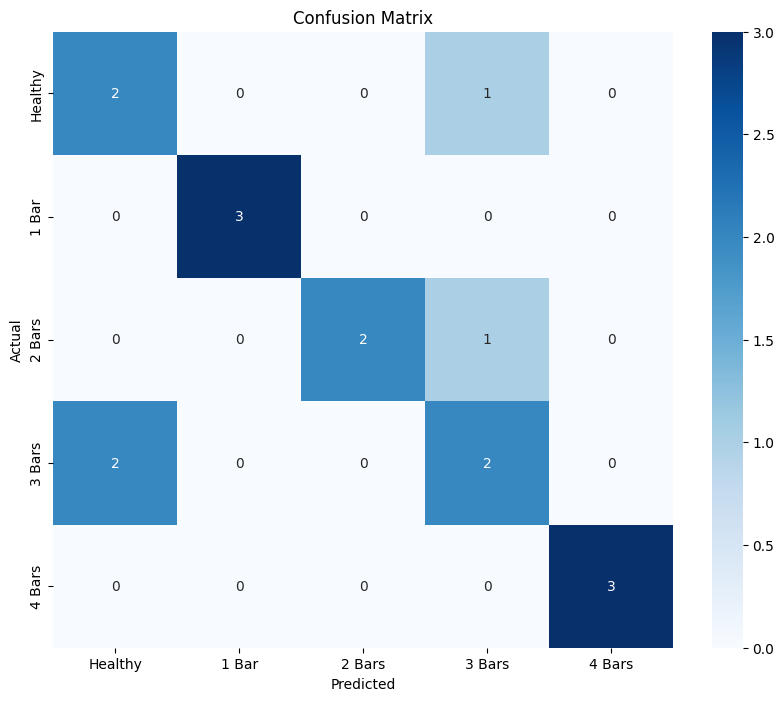

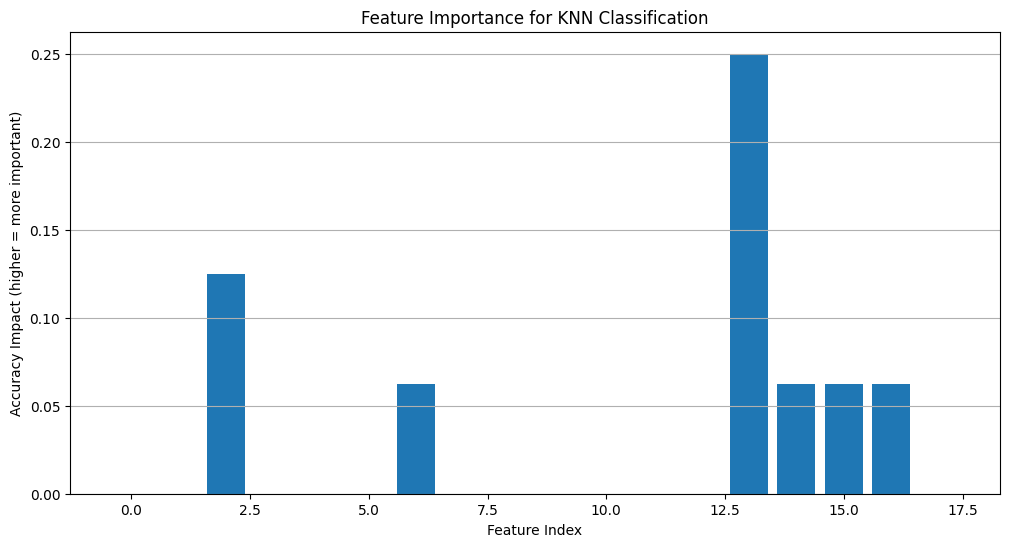

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, Dict, Any

def train_test_knn(X: np.ndarray, y: np.ndarray, test_size: float = 0.2, random_state: int = 42) -> Tuple[Dict[str, Any], float]:
    """
    Train and evaluate a K-Nearest Neighbors classifier on motor fault data.

    Args:
        X: Feature matrix with shape (n_samples, n_features)
        y: Target labels with shape (n_samples,)
        test_size: Fraction of data to use for testing
        random_state: Random seed for reproducibility

    Returns:
        Tuple of (best model parameters, test accuracy)
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                       random_state=random_state, stratify=y)

    # Scale the features
    scaler: StandardScaler = StandardScaler()
    X_train_scaled: np.ndarray = scaler.fit_transform(X_train)
    X_test_scaled: np.ndarray = scaler.transform(X_test)

    # Find optimal K using grid search with cross-validation
    param_grid: Dict[str, Any] = {
        "n_neighbors": np.arange(1, 21),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    }

    grid_search: GridSearchCV = GridSearchCV(
        KNeighborsClassifier(),
        param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

    # Get best model
    best_knn = grid_search.best_estimator_

    # Evaluate on test set
    y_pred: np.ndarray = best_knn.predict(X_test_scaled)
    accuracy: float = best_knn.score(X_test_scaled, y_test)

    # Print results
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {best_knn.score(X_train_scaled, y_train):.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm: np.ndarray = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Healthy", "1 Bar", "2 Bars", "3 Bars", "4 Bars"],
                yticklabels=["Healthy", "1 Bar", "2 Bars", "3 Bars", "4 Bars"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Return best parameters and accuracy
    return grid_search.best_params_, accuracy

# Run the training and evaluation
best_params, test_accuracy = train_test_knn(X, y)

# Visualize feature importance by looking at the impact of each feature
# using a simpler KNN model with the best K
def plot_feature_importance(X: np.ndarray, y: np.ndarray, best_k: int) -> None:
    """
    Visualize feature importance for KNN by measuring accuracy impact
    when each feature is removed.

    Args:
        X: Feature matrix
        y: Target labels
        best_k: Best K value from grid search
    """
    # Scale all features
    scaler: StandardScaler = StandardScaler()
    X_scaled: np.ndarray = scaler.fit_transform(X)

    # Get baseline accuracy with all features
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    baseline_score: float = knn.score(X_test, y_test)

    # Check impact of removing each feature
    feature_impacts: list[float] = []
    for i in range(X.shape[1]):
        # Create copy without this feature
        X_train_reduced = np.delete(X_train, i, axis=1)
        X_test_reduced = np.delete(X_test, i, axis=1)

        # Train and evaluate
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_reduced, y_train)
        reduced_score = knn.score(X_test_reduced, y_test)

        # Impact is the difference in accuracy
        impact = baseline_score - reduced_score
        feature_impacts.append(impact)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(feature_impacts)), feature_impacts)
    plt.xlabel("Feature Index")
    plt.ylabel("Accuracy Impact (higher = more important)")
    plt.title("Feature Importance for KNN Classification")
    plt.grid(axis="y")
    plt.show()

# Use the best K from grid search
plot_feature_importance(X, y, best_params["n_neighbors"])